In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N = 10
x = np.random.uniform(-5,5,size=N)
f = lambda x: np.sin(x/5) + np.cos(x)
epsilon = np.random.normal(0,.2,size=N)
y = f(x) + epsilon
plt.plot(x,y,marker='+',markersize=10,linestyle='None')

# Prediction using prior

(-10.0, 10.0)

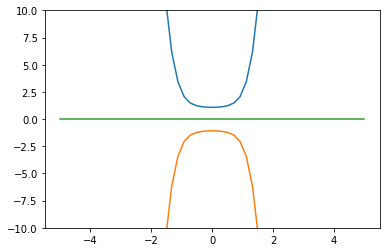

In [15]:
K = 6
sigma = .2
xs = np.linspace(-5,5,50)
V = np.array([sum([x**(2*j) for j in range(K)])/4+sigma**2 for x in xs])
plt.plot(xs,2*np.sqrt(V))
plt.plot(xs,-2*np.sqrt(V))
plt.plot(xs,np.zeros(np.shape(xs)))
ax = plt.gca()
ax.set_ylim(-10,10)

# Computing posterior

In [69]:
K=7
S0=np.eye(K)/4
Phi = np.vander(x,K)[:,::-1]
SN = np.linalg.inv(4*np.eye(K) + sigma**(-2)*Phi.T@Phi)
mN = sigma**(-2)*SN@Phi.T@y

# Prediction using posterior

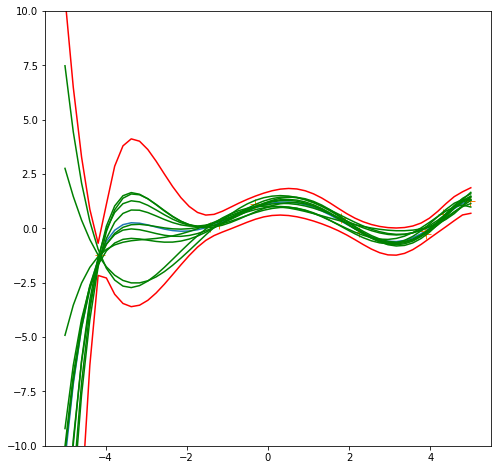

In [76]:
sigma = .2
xs = np.linspace(-5,5,50)
E = np.vectorize(lambda x: np.array([x**j for j in range(K)])@mN)
def V(x):
    phi = np.array([x**j for j in range(K)])
    return phi.T@SN@phi + sigma**2
V = np.vectorize(V)
plt.plot(xs,E(xs))
plt.plot(xs,E(xs) + 2*np.sqrt(V(xs)),color='red')
plt.plot(xs,E(xs) - 2*np.sqrt(V(xs)),color='red')
plt.plot(x,y,marker='+',markersize=10,linestyle='None')
ax = plt.gca()
ax.set_ylim(-10,10)
fig = plt.gcf()
fig.set_size_inches(8,8)
for _ in range(10):
    theta = np.random.multivariate_normal(mN,SN)
    g = np.vectorize(lambda x: np.array([x**j for j in range(K)])@theta)
    plt.plot(xs,g(xs),color='green')
